In [2]:
import numpy as np
from numpy import load
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd 
from sklearn.multioutput import MultiOutputRegressor
import pickle

In [59]:
features = load('features.npy') 
labels = load('labels.npy')

features = features / features.max(axis=0)

indices_equal_right = np.where(labels[:,0] == 1)[0]
indices_equal_right_0 = np.where(labels[:,0] == 0)[0]

balanced_indices_0 = np.random.choice(indices_equal_right_0, len(indices_equal_right))
# print(balanced_indices_0[0])
features_balanced = np.concatenate((features[balanced_indices_0],features[indices_equal_right]))
labels_balanced = np.concatenate((labels[balanced_indices_0],labels[indices_equal_right]))[:,0]


# equal_sample_indices_right_1 = features[np.random.choice(len(indices_equal_right_0), size=len(indices_equal_right), replace=False)]
# features_balanced = features[equal_sample_indices_right_1]
# labels = labels[equal_sample_indices_right_1]
# len(np.where(labels[:,0] == 1)[0])

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10)
X_train, X_test, y_train, y_test = train_test_split(features_balanced, labels_balanced, test_size=0.10)

In [186]:
len(np.where(y_test[:,0] == 0)[0])

594

In [114]:
 clf = svm.SVC()
 clf.fit(X_train, y_train)
 accuracy_score(clf.predict(X_test),y_test)

0.7319819819819819

In [112]:
neighbors = np.arange(1,10,1)
accuracies = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

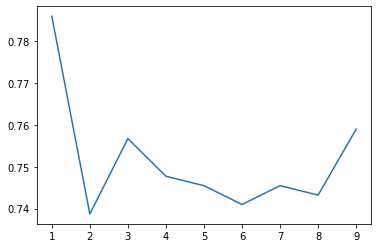

In [113]:
plt.plot(neighbors,accuracies)

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_balanced, labels_balanced)
knn_filename = "knn_model.pkl"
with open(knn_filename, 'wb') as file:
    pickle.dump(knn, file)    

In [92]:
knn.predict([features[4]])
# features[0]

array([0])

In [94]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
right_labels = labels[:,0]

In [106]:
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
model.fit(features_balanced, labels_balanced, epochs=10, batch_size=10)

Epoch 1/10
444/444 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.5829
Epoch 2/10
444/444 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.6910
Epoch 3/10
444/444 [==============================] - 1s 1ms/step - loss: 0.6215 - accuracy: 0.6761
Epoch 4/10
444/444 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7034
Epoch 5/10
444/444 [==============================] - 1s 1ms/step - loss: 0.5901 - accuracy: 0.7016
Epoch 6/10
444/444 [==============================] - 1s 1ms/step - loss: 0.5855 - accuracy: 0.7099
Epoch 7/10
444/444 [==============================] - 1s 1ms/step - loss: 0.5829 - accuracy: 0.7119
Epoch 8/10
444/444 [==============================] - 1s 1ms/step - loss: 0.5940 - accuracy: 0.7023
Epoch 9/10
444/444 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7097
Epoch 10/10
444/444 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7090